In [113]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [114]:
#loading training dataset
data_train = pd.read_csv("/home/rahul/train.csv")
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [115]:
#loading test data
data_test = pd.read_csv("/home/rahul/test.csv")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [116]:
#combining training and testing set
df= data_train.append(data_test,ignore_index= True)
df.head()
df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [117]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [1]:
df["Alley"].isnull().sum()/df.shape[0]

NameError: name 'df' is not defined

In [120]:
df["LotFrontage"].isnull().sum()/df.shape[0]

0.16649537512846865

In [121]:
#removing the coloumns having null values
df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [122]:
df.isnull().sum().sort_values(ascending=False).head(15)

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

In [123]:
#separating categorical and numerical data
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['int64','float64'])

In [124]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [125]:
#filling null values 
for col in df_cat:
    x=df[col].mode()[0]
    df[col]=df[col].fillna(x)

In [126]:
df.isnull().sum().sort_values(ascending=False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
                ... 
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
MSSubClass         0
Heating            0
Length: 76, dtype: int64

In [127]:
num=df_num.columns
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [128]:
num=num[1:37]
num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [129]:
#filling null values
for col in num:
    df[col].fillna(df[col].median(),inplace=True)


In [130]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 76, dtype: int64

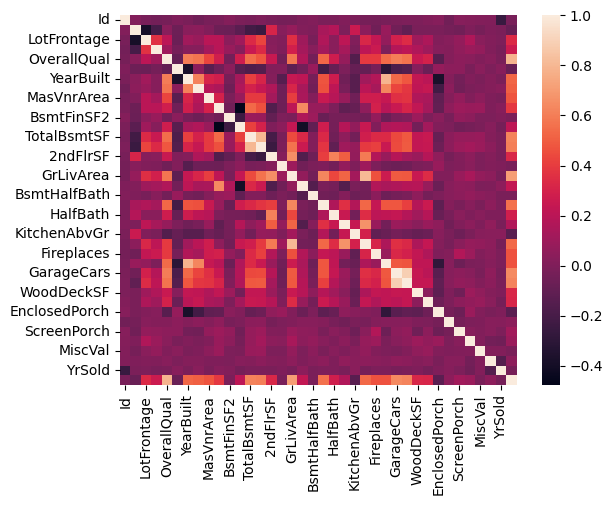

In [131]:
#checking correlation
sns.heatmap(df.corr())
plt.show()

In [132]:
#encoding categorical data
cat=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']


In [133]:
# df=pd.get_dummies(data=df,columns=cat,drop_first=True)
from sklearn.preprocessing import LabelEncoder
for col in cat:
    le=LabelEncoder()

    df[col]=le.fit_transform(df[[col]])

In [134]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0


In [135]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [136]:
# #transforming year column
year=["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]
for i in year:
     df[i]=df[i].apply(lambda x: 2022-x)



In [137]:
#final clean dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,14,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,15,8,4,181500.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,14,8,4,223500.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,16,8,0,140000.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,14,8,4,250000.0


In [138]:
df['SalePrice'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2914     True
2915     True
2916     True
2917     True
2918     True
Name: SalePrice, Length: 2919, dtype: bool

In [139]:
#final train dataset
df_train_new = df[:1460]
df_train_new.set_index("Id")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,14,8,4,208500.0
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,15,8,4,181500.0
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,14,8,4,223500.0
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,16,8,0,140000.0
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,14,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,15,8,4,175000.0
1457,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,12,8,4,210000.0
1458,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,12,8,4,266500.0


In [140]:
#final testing dataset
df_test_new = df[1460:]
df_test_new.drop(columns=["SalePrice"],inplace=True)
df_test_new.set_index("Id")


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,12,8,4
1462,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,12,8,4
1463,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,12,8,4
1464,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,12,8,4
1465,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,12,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,16,8,4
2916,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,16,8,0
2917,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,16,8,0


In [141]:
#Applying Scaling
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()


In [142]:
#split the train data
x = df_train_new.drop(columns=["SalePrice"])
y = df_train_new[["SalePrice"]]

In [143]:
#splitting  into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 75), (292, 75), (1168, 1), (292, 1))

In [144]:
#applying scaling
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [145]:
#Applying scaling on test data set
df_test_new=ss.fit_transform(df_test_new)


# PCA

In [146]:
#apply PCA
from sklearn.decomposition import PCA

In [147]:
#create object of PCA class
pc=PCA(n_components=0.95)
#n_components  inbuilt parameters ,here  pass no. of components means PC here 
#total input 13 features input features

In [148]:
pc.fit(x_train)

PCA(n_components=0.95)

In [149]:
pc.n_components_

56

In [150]:
explain_variance=pc.explained_variance_ratio_
#explained_varianced_ratio_  inbuilt method of PCA
print(explain_variance)
#automatic arrange variance in decending order

[0.13804684 0.05413985 0.05002556 0.04093976 0.03120417 0.02841709
 0.02477629 0.02319925 0.02157828 0.02057843 0.02017418 0.0187904
 0.01847327 0.01753922 0.01717419 0.01638035 0.0161407  0.01603357
 0.01571661 0.01545508 0.01491383 0.01457453 0.01425484 0.01384958
 0.01344557 0.01293174 0.01273426 0.01239946 0.01216614 0.01177331
 0.01143524 0.01127721 0.01107997 0.0106109  0.01044404 0.0104099
 0.01004073 0.00980881 0.00952053 0.0090334  0.00882805 0.00862733
 0.00840914 0.00805101 0.00785302 0.0077931  0.00720526 0.00706967
 0.00661658 0.00640932 0.0059775  0.00582001 0.00566247 0.00552778
 0.00527204 0.00522197]


<AxesSubplot:>

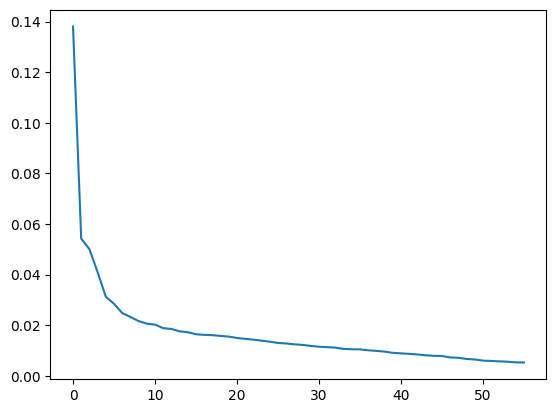

In [151]:
sns.lineplot(data=explain_variance)

In [152]:
pc=PCA(n_components=25)
x_train_pc=pc.fit_transform(x_train)
x_test_pc=pc.transform(x_test)
df_test_new=pc.fit_transform(df_test_new)

In [153]:

# Applying linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [154]:
#train the model
lr.fit(x_train_pc,y_train)


LinearRegression()

In [155]:
# test the model
y_pred = lr.predict(x_test_pc)
y_pred
lr.coef_
lr.intercept_

array([179237.41523973])

In [156]:
#evaluation of the model 
from sklearn.metrics import mean_squared_error
e=mean_squared_error(y_test,y_pred,squared=False)
print("mean_squared_error=",e)

mean_squared_error= 38836.24841103232


In [157]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8054000456554589


In [158]:
#test the new data
pred_test = lr.predict(df_test_new)
pred_test[:5]

array([[123840.86753373],
       [198701.35620101],
       [201689.25722167],
       [201049.39586764],
       [192368.324181  ]])

In [159]:
final_prediction=pd.DataFrame(pred_test,columns=["SalePrice"]) 
final_prediction["Id"]=data_test["Id"]
final_prediction

,SalePrice,Id
0,123840.867534,1461
1,198701.356201,1462
2,201689.257222,1463
3,201049.395868,1464
4,192368.324181,1465
...,...,...
1454,64112.966759,2915
1455,63141.079484,2916
1456,208134.815666,2917
1457,151126.268136,2918


In [160]:
df_test_final = pd.merge(data_test,final_prediction,on="Id",how="inner")
df_test_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,123840.867534
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,198701.356201
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,201689.257222
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,201049.395868
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,192368.324181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,64112.966759
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,63141.079484
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,208134.815666
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,151126.268136


In [161]:
#df_test_final.to_csv("test_prediction.csv",index=False)

# XGBoost Regressor

In [162]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xg=XGBRegressor(objective='reg:linear',n_estimators=42,max_depth=10,n_jobs=15,seed=25)

In [ ]:
xg.fit(x_train_pc,y_train)

In [ ]:
y_pred_xg=xg.predict(x_test_pc)

In [ ]:
mean_squared_error(y_test,y_pred_xg,squared=False)

In [ ]:
r2_score(y_test,y_pred_xg)